In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
from pycaret.datasets import get_data
from pycaret.classification import *
from pycaret.utils import check_metric
from IPython.display import display

In [2]:
# Getting the Data
dataset = get_data('credit')
dataset.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis='columns', inplace=True)

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,90000,2,2,2,34,0,0,0,0,0,0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
2,50000,2,2,1,37,0,0,0,0,0,0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
3,50000,1,2,1,57,-1,0,-1,0,0,0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
4,50000,1,1,2,37,0,0,0,0,0,0,64400.0,57069.0,57608.0,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0


In [3]:
#check the shape of data
dataset.shape

(24000, 18)

In [4]:
print(dataset.nunique())

LIMIT_BAL       80
SEX              2
EDUCATION        7
MARRIAGE         4
AGE             56
BILL_AMT1    18660
BILL_AMT2    18363
BILL_AMT3    18134
BILL_AMT4    17733
BILL_AMT5    17312
BILL_AMT6    16963
PAY_AMT1      6938
PAY_AMT2      6904
PAY_AMT3      6589
PAY_AMT4      6036
PAY_AMT5      5985
PAY_AMT6      6047
default          2
dtype: int64


In [5]:
cat_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [6]:
data = dataset.sample(frac=0.95, random_state=786)
data_unseen = dataset.drop(data.index)
data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)
print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (22800, 18)
Unseen Data For Predictions: (1200, 18)


In [7]:
# Setting up Environment in PyCaret
experiment = setup(dataset, target='default', categorical_features=cat_features, silent=True)

,Description,Value
0,session_id,6594
1,Target,default
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(24000, 18)"
5,Missing Values,False
6,Numeric Features,14
7,Categorical Features,3
8,Ordinal Features,False
9,High Cardinality Features,False


In [8]:
# Comparing All Models
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.7868,0.7230,0.2133,0.5665,0.3096,0.2131,0.2489,0.1260
gbc,Gradient Boosting Classifier,0.7857,0.7277,0.1509,0.5883,0.2401,0.1635,0.2155,1.6500
ada,Ada Boost Classifier,0.7840,0.7116,0.1228,0.5922,0.2030,0.1364,0.1942,0.3650
rf,Random Forest Classifier,0.7827,0.7094,0.1889,0.5466,0.2803,0.1866,0.2236,1.0770
ridge,Ridge Classifier,0.7756,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190
lda,Linear Discriminant Analysis,0.7756,0.6488,0.0000,0.0000,0.0000,0.0000,0.0000,0.0320
dummy,Dummy Classifier,0.7756,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0190
lr,Logistic Regression,0.7754,0.6454,0.0000,0.0000,0.0000,-0.0004,-0.0039,0.3330
et,Extra Trees Classifier,0.7734,0.6728,0.1279,0.4813,0.2018,0.1191,0.1550,0.5440
knn,K Neighbors Classifier,0.7474,0.6026,0.1934,0.3780,0.2556,0.1223,0.1324,0.1370


In [9]:
print(best_model)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=6594, reg_alpha=0.0, reg_lambda=0.0, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [10]:
predict_model(best_model)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.7939,0.7223,0.2109,0.5436,0.3039,0.2097,0.2422


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default,Label,Score
0,370000.0,35.0,236242.0,240804.0,243293.0,226471.0,217901.0,195244.0,10301.0,11000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.9147
1,130000.0,31.0,95292.0,97544.0,99208.0,102946.0,103750.0,105818.0,4600.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7696
2,200000.0,33.0,77670.0,80051.0,80906.0,82088.0,81564.0,87241.0,6782.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8936
3,200000.0,31.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.7848
4,210000.0,41.0,62261.0,6615.0,0.0,0.0,0.0,0.0,6615.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,100000.0,24.0,87478.0,88627.0,92187.0,95030.0,29470.0,3470.0,3500.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8685
7197,20000.0,22.0,20117.0,18784.0,19538.0,17958.0,4968.0,780.0,1466.0,2000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8084
7198,150000.0,35.0,145063.0,134701.0,133145.0,120821.0,107280.0,105510.0,5000.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8802
7199,140000.0,25.0,81960.0,81757.0,83046.0,84034.0,77659.0,77180.0,3005.0,3000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8524


In [11]:
# Predict on test
predict_model(best_model, data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8175,0.8396,0.2700,0.7245,0.3934,0.3114,0.3643


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.7765
1,380000,1,2,2,32,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9747
2,200000,2,2,1,32,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.9325
3,200000,1,1,1,53,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.7642
4,240000,1,1,2,41,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.6227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,10904.0,9316.0,4328.0,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,1,0.6482
1196,220000,1,2,1,41,45075.0,8840.0,1369.0,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9148
1197,420000,1,1,2,34,131939.0,136721.0,140011.0,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.9203
1198,90000,1,2,1,36,7752.0,9112.0,10306.0,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.6435


In [12]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [13]:
# Decision Tree Classifier
dt = create_model('dt')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6952,0.5846,0.3846,0.3412,0.3616,0.1624,0.1629
1,0.6929,0.5761,0.3554,0.3292,0.3418,0.1419,0.1421
2,0.7167,0.6024,0.3952,0.3753,0.3850,0.2011,0.2012
3,0.6976,0.5784,0.3634,0.3383,0.3504,0.1537,0.1538
4,0.7161,0.5984,0.3820,0.3711,0.3765,0.1927,0.1927
5,0.7131,0.5956,0.3740,0.3643,0.3691,0.1835,0.1835
6,0.6899,0.5759,0.3660,0.3286,0.3463,0.1438,0.1442
7,0.6958,0.5907,0.4005,0.3463,0.3715,0.1722,0.1730
8,0.6917,0.5789,0.3714,0.3325,0.3509,0.1495,0.1499


In [14]:
#trained model object is stored in the variable 'dt'. 
print(dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6594, splitter='best')


In [15]:
# Tune a Model - Decision Tree Classifier
tuned_dt = tune_model(dt)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7839,0.6662,0.1538,0.5686,0.2422,0.1621,0.2098
1,0.7720,0.6994,0.2016,0.4810,0.2841,0.1747,0.1982
2,0.7798,0.6876,0.1698,0.5289,0.2570,0.1661,0.2034
3,0.7756,0.6889,0.1645,0.5000,0.2475,0.1535,0.1865
4,0.7750,0.6867,0.1114,0.4941,0.1818,0.1082,0.1492
5,0.7798,0.6873,0.1830,0.5267,0.2717,0.1763,0.2107
6,0.7792,0.6835,0.2361,0.5174,0.3242,0.2137,0.2372
7,0.7792,0.6884,0.1724,0.5242,0.2595,0.1669,0.2029
8,0.7911,0.6795,0.2467,0.5812,0.3464,0.2455,0.2775


In [16]:
#tuned model object is stored in the variable 'tuned_dt'. 
print(tuned_dt)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=1.0, max_leaf_nodes=None,
                       min_impurity_decrease=0.0002, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=6594, splitter='best')


In [17]:
# K Neighbors Classifier
knn = create_model('knn')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7375,0.5969,0.1565,0.3242,0.2111,0.0761,0.0834
1,0.7357,0.5892,0.1830,0.3366,0.2371,0.0939,0.1002
2,0.7458,0.5950,0.2042,0.3775,0.2651,0.1276,0.1364
3,0.7595,0.6115,0.1830,0.4182,0.2546,0.1367,0.1533
4,0.7482,0.5991,0.2016,0.3838,0.2643,0.1299,0.1397
5,0.7506,0.6086,0.2069,0.3939,0.2713,0.1381,0.1485
6,0.7435,0.6005,0.1963,0.3663,0.2556,0.1174,0.1258
7,0.7446,0.6011,0.1857,0.3646,0.2460,0.1115,0.1207
8,0.7530,0.5829,0.1963,0.3978,0.2629,0.1346,0.1467


In [18]:
# Tune a Model - K Neighbors Classifier
tuned_knn = tune_model(knn, custom_grid = {'n_neighbors' : np.arange(1,31,1)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7702,0.6290,0.0902,0.4416,0.1498,0.0797,0.1141
1,0.7661,0.6335,0.0849,0.4000,0.1400,0.0667,0.0941
2,0.7714,0.6483,0.0743,0.4444,0.1273,0.0673,0.1041
3,0.7750,0.6702,0.0981,0.4933,0.1637,0.0964,0.1393
4,0.7786,0.6525,0.0849,0.5424,0.1468,0.0916,0.1454
5,0.7792,0.6650,0.0796,0.5556,0.1392,0.0879,0.1447
6,0.7738,0.6518,0.0928,0.4795,0.1556,0.0892,0.1303
7,0.7792,0.6451,0.1061,0.5405,0.1774,0.1120,0.1627
8,0.7756,0.6556,0.0849,0.5000,0.1451,0.0856,0.1315


In [19]:
print(tuned_knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=25, p=2,
                     weights='uniform')


In [20]:
# Random Forest Classifier
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7833,0.7050,0.1698,0.5565,0.2602,0.1735,0.2158
1,0.7744,0.6994,0.1645,0.4921,0.2465,0.1511,0.1827
2,0.7768,0.7182,0.1698,0.5079,0.2545,0.1600,0.1935
3,0.7720,0.7089,0.1963,0.4805,0.2787,0.1708,0.1950
4,0.7857,0.7203,0.1777,0.5726,0.2713,0.1846,0.2284
5,0.7851,0.6943,0.2069,0.5571,0.3017,0.2051,0.2405
6,0.7923,0.7019,0.2255,0.5986,0.3276,0.2334,0.2725
7,0.7845,0.7144,0.1989,0.5556,0.2930,0.1981,0.2346
8,0.7875,0.7091,0.1857,0.5833,0.2817,0.1944,0.2386


In [21]:
# Tune a Model - Random Forest Classifier
tuned_rf = tune_model(rf, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7827,0.7181,0.1883,0.5462,0.2801,0.1865,0.2234
1,0.7756,0.7166,0.1936,0.5000,0.2792,0.1759,0.2038
2,0.7893,0.7238,0.2095,0.5852,0.3086,0.2158,0.2556
3,0.7768,0.7165,0.1989,0.5068,0.2857,0.1823,0.2104
4,0.7786,0.7236,0.1777,0.5194,0.2648,0.1698,0.2039
5,0.7851,0.7134,0.2095,0.5563,0.3044,0.2071,0.2418
6,0.7881,0.7064,0.2228,0.5714,0.3206,0.2227,0.2576
7,0.7917,0.7190,0.2228,0.5957,0.3243,0.2303,0.2694
8,0.7863,0.7059,0.1936,0.5703,0.2891,0.1979,0.2381


findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


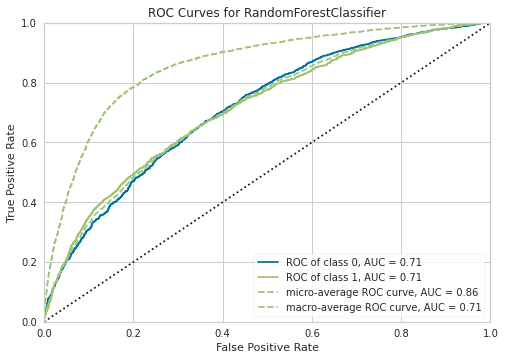

In [22]:
# Plot a Model - AUC Plot
plot_model(tuned_rf, plot = 'auc')

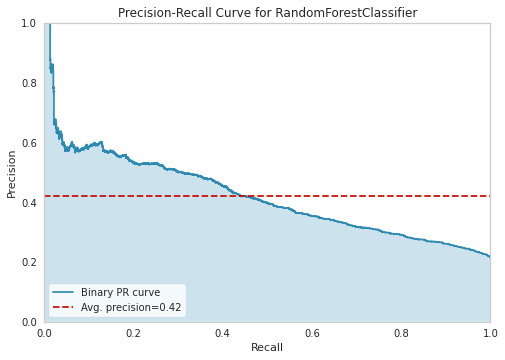

In [23]:
# Plot a Model - Precision-Recall Curve
plot_model(tuned_rf, plot = 'pr')

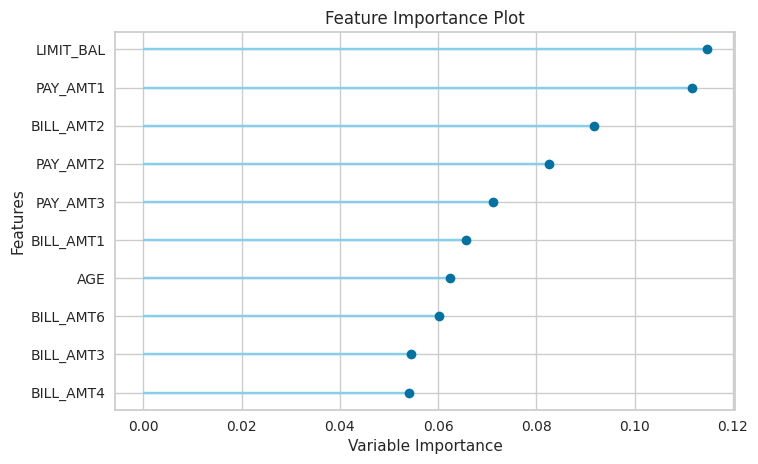

In [24]:
# Plot a Model - Feature Importance Plot
plot_model(tuned_rf, plot='feature')

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial, Liberation Sans, Bitstream Vera Sans, sans-serif


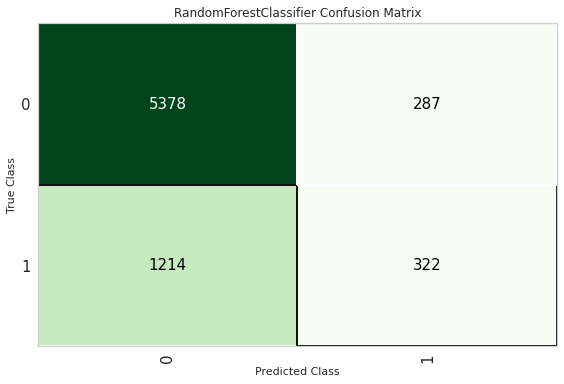

In [25]:
# Plot a Model - Confusion Matrix
plot_model(tuned_rf, plot = 'confusion_matrix')

In [26]:
# Finalize Model for Deployment
final_rf = finalize_model(tuned_rf)

In [27]:
#Final Random Forest model parameters for deployment
print(final_rf)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={},
                       criterion='gini', max_depth=10, max_features=1.0,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, n_estimators=230,
                       n_jobs=-1, oob_score=False, random_state=6594, verbose=0,
                       warm_start=False)


In [28]:
predict_model(final_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8520,0.8592,0.3581,0.8730,0.5078,0.4381,0.4987


,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3,default,Label,Score
0,370000.0,35.0,236242.0,240804.0,243293.0,226471.0,217901.0,195244.0,10301.0,11000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8750
1,130000.0,31.0,95292.0,97544.0,99208.0,102946.0,103750.0,105818.0,4600.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8664
2,200000.0,33.0,77670.0,80051.0,80906.0,82088.0,81564.0,87241.0,6782.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9198
3,200000.0,31.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8557
4,210000.0,41.0,62261.0,6615.0,0.0,0.0,0.0,0.0,6615.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7196,100000.0,24.0,87478.0,88627.0,92187.0,95030.0,29470.0,3470.0,3500.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0.8623
7197,20000.0,22.0,20117.0,18784.0,19538.0,17958.0,4968.0,780.0,1466.0,2000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8323
7198,150000.0,35.0,145063.0,134701.0,133145.0,120821.0,107280.0,105510.0,5000.0,5000.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.8636
7199,140000.0,25.0,81960.0,81757.0,83046.0,84034.0,77659.0,77180.0,3005.0,3000.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0.8720


In [29]:
# Predict on unseen data
unseen_predictions = predict_model(final_rf, data=data_unseen)
display(unseen_predictions)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8483,0.8624,0.3536,0.8857,0.5054,0.4347,0.4989


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,Label,Score
0,100000,2,2,2,23,11876.0,380.0,601.0,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0,0,0.8419
1,380000,1,2,2,32,22401.0,21540.0,15134.0,32018.0,11849.0,11873.0,21540.0,15138.0,24677.0,11851.0,11875.0,8251.0,0,0,0.9687
2,200000,2,2,1,32,9076.0,5787.0,-684.0,5247.0,3848.0,3151.0,5818.0,15.0,9102.0,17.0,3165.0,1395.0,0,0,0.9268
3,200000,1,1,1,53,138180.0,140774.0,142460.0,144098.0,147124.0,149531.0,6300.0,5500.0,5500.0,5500.0,5000.0,5000.0,1,0,0.8412
4,240000,1,1,2,41,95.0,2622.0,3301.0,3164.0,360.0,1737.0,2622.0,3301.0,0.0,360.0,1737.0,924.0,0,0,0.8301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,50000,1,2,1,37,10904.0,9316.0,4328.0,2846.0,1585.0,1324.0,0.0,3000.0,0.0,0.0,1000.0,1000.0,1,1,0.5833
1196,220000,1,2,1,41,45075.0,8840.0,1369.0,5924.0,1759.0,1824.0,8840.0,6643.0,5924.0,1759.0,1824.0,7022.0,0,0,0.9320
1197,420000,1,1,2,34,131939.0,136721.0,140011.0,141695.0,144839.0,147954.0,7000.0,7000.0,5500.0,5500.0,5600.0,5000.0,0,0,0.8982
1198,90000,1,2,1,36,7752.0,9112.0,10306.0,11328.0,12036.0,14329.0,1500.0,1500.0,1500.0,1200.0,2500.0,0.0,1,0,0.7563


In [30]:
check_metric(unseen_predictions['default'], unseen_predictions['Label'], metric = 'Accuracy')

0.8483

In [31]:
# Saving the model
save_model(final_rf,'final-rf-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['SEX', 'EDUCATION',
                                                             'MARRIAGE'],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='default',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_valu...
                  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                         class_weight={}, criterion='gini',
                                         max_depth=10, max_features=1.0,
                        

In [32]:
# Loading the saved model
saved_final_rf = load_model('final-rf-model')

Transformation Pipeline and Model Successfully Loaded


In [33]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8483,0.8624,0.3536,0.8857,0.5054,0.4347,0.4989


In [34]:
check_metric(new_prediction['default'], new_prediction['Label'], metric = 'Accuracy')

0.8483